Following are the list of tasks to be completed:

* Transform the image in the +x direction by 25%, and create an image
* Transform the image in the +y direction by 25%, and create an image
* Rotate the image in Z by 90 degree
* Rotate the image in Z by -90 degree
* From the center of the image, in all directions, increase the RGB values of the pixels in a manner that, each pixel from the center, the percentage drops by 1%. i.e. the center pixel's RGB will increase by 50%, and the next pixels in x and y directions will be 49%. This goes on and on until the increase becomes 0 %.

Imports

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Read the image

In [111]:
## show image
def show_image(image, filename='image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
    cv2.imwrite(filename + '.jpg', image)

Size of image: (251, 201, 3)


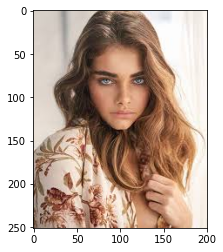

In [112]:
image = cv2.imread('images.jpg')
print(f"Size of image: {image.shape}")
show_image(image)

In [114]:
## shift func
def shift_image(image, xshift, yshift):
    # shift matrix
    shift = np.float32([[1, 0, xshift], [0, 1, yshift]])

    shifted_image = cv2.warpAffine(image, shift, (width, height))
    show_image(shifted_image, "shifted_image")
    
## rotate func    
def rotate_image(image, rotation):
    # Shape of image in terms of pixels.
    (rows, cols) = image.shape[:2]
  
    rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation, 1)
    rotated_image = cv2.warpAffine(image, rotate, (cols, rows))
    show_image(rotated_image, "rotated_image")

### Translate image to +x by 25%

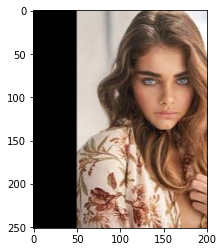

In [115]:
(height, width) = image.shape[:2]
xshift = width * 0.25 # 25% shift in x-axis
shift_image(image, xshift, 0)

### Translate image to +y by 25%

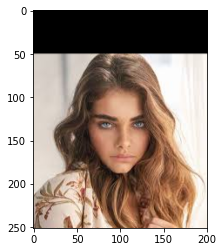

In [116]:
(height, width) = image.shape[:2] # image shape
yshift = width * 0.25 # 25% shift in y-axis
shift_image(image, 0, yshift)

### Rotate image by +90 degree

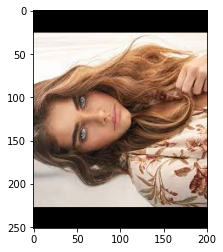

In [117]:
rotate_image(image, 90)

### Rotate image by -90 degrees

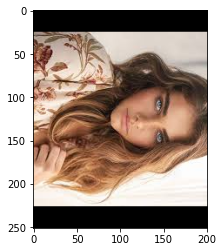

In [118]:
rotate_image(image, -90)

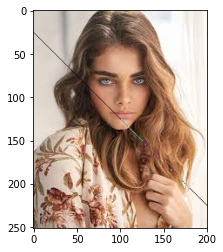

In [120]:
(height, width) = image.shape[:2]
midH = int(height/2)
midW = int(width/2)

for i in range(midH, height):
    image[midH, midW] = image[midH, midW] * ((50-i)/100)

for i in range(midW, width):
    image[midH, midW] = image[midH, midW] * ((50-i)/100)
    
countX = midH
countY = midW
while countX < height and countY < width:
    image[countX, countY] = image[countX, countY] * ((50-i)/100)
    countX += 1
    countY += 1  
    
for i in range(midH, 0, -1):
    image[midH, midW] = image[midH, midW] * ((50-(midH-i))/100)

for i in range(midW, 0, -1):
    image[midH, midW] = image[midH, midW] * ((50-(midW-i))/100)
    
countX = midH
countY = midW
while countX > 0 and countY > 0:
    image[countX, countY] = image[countX, countY] * ((50-i)/100)
    countX -= 1
    countY -= 1    
    
    
show_image(image, "distributed_image")